In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

import numpy as np

from scipy.ndimage import binary_fill_holes
from scipy.ndimage import distance_transform_edt
import cv2
from skimage import feature,io, color
from skimage.color import label2rgb
from skimage.feature import peak_local_max
from skimage.filters import median,try_all_threshold
from skimage.measure import label, regionprops
from skimage.morphology import diamond, disk, opening, closing,dilation, erosion


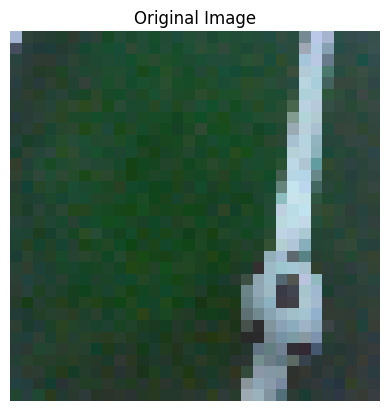

[[138 152 161 ... 128 119 126]
 [ 94 154 165 ... 136 136 122]
 [153 153 160 ... 137 160 130]
 ...
 [155 165 160 ... 152 145 151]
 [155 158 173 ... 168 150 141]
 [175 155 177 ... 141 150 136]]


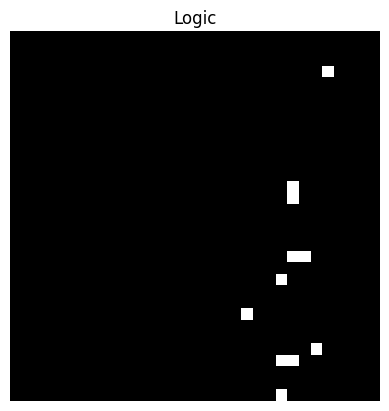

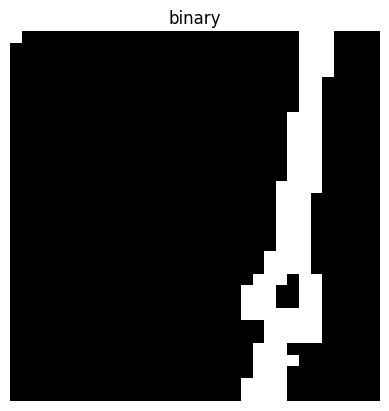

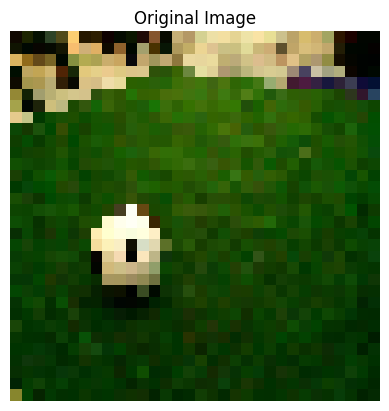

[[239 228 251 ... 229 255 255]
 [238 254 247 ...   0   0 252]
 [197  86 132 ... 252 255 255]
 ...
 [247 250 250 ... 235 254   0]
 [252 251 236 ... 249 255 255]
 [ 76 253 251 ... 251 255 250]]


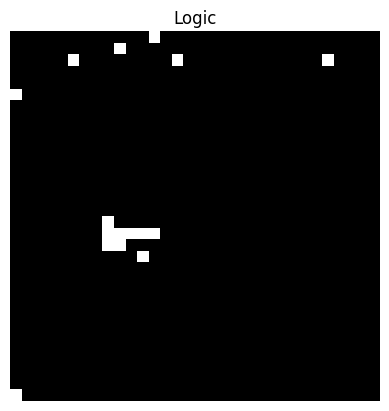

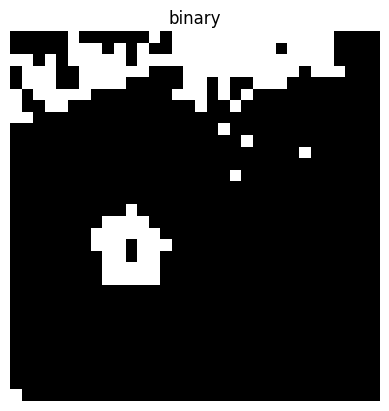

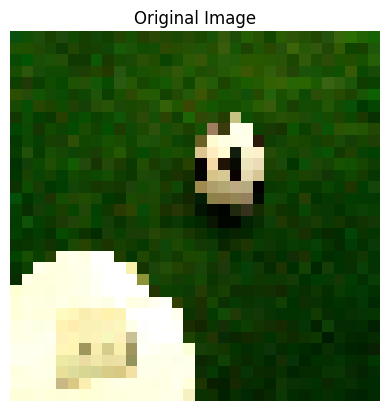

[[233 236 218 ... 212 220 232]
 [226 226 223 ... 241 232 217]
 [244 254 226 ... 222 234 212]
 ...
 [ 34  29  25 ... 247 252 252]
 [ 27  31  30 ... 244 253 255]
 [ 38  42  34 ... 255 252 254]]


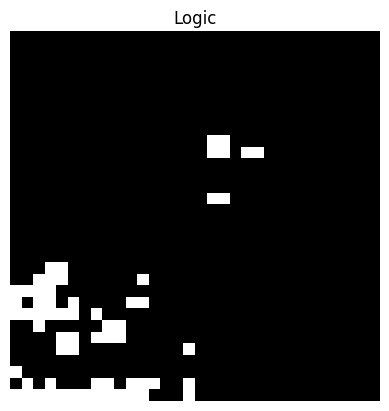

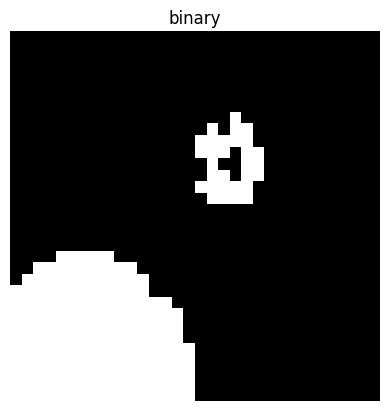

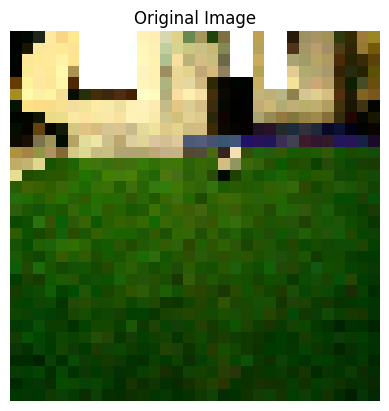

[[  0 253 202 ... 201  41  67]
 [253 230 106 ... 203  55 131]
 [255 105 108 ... 212 197 154]
 ...
 [244 253 250 ... 242 240 253]
 [254   0 243 ... 249 250 246]
 [253 249 250 ... 255 244 253]]


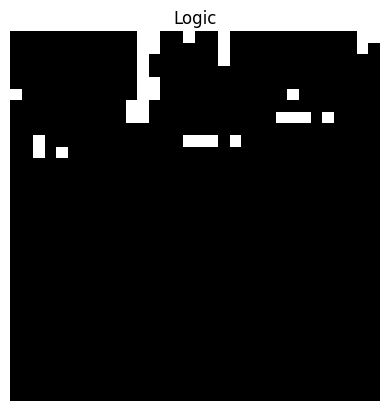

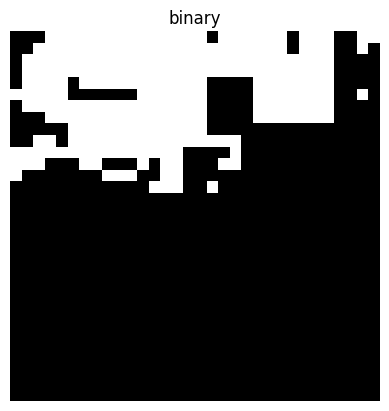

In [123]:
path = "BallDetect/trainval/images/robby_real_bottom0668.png"
b = "ImagesFromNao/field_09.jpg"
b2 = "ImagesFromNao/field_08.jpg"
b3 = "ImagesFromNao/field_07.jpg"

imgs = [path, b,b2,b3]
for im in imgs:
    im = cv2.imread(im)
    im = cv2.resize(im, (32,32))
    plt.imshow(im)
    plt.axis("off")
    plt.title("Original Image")
    plt.show()

    b,g,r = cv2.split(im)
    g = -(b+r)
    print(g)
    bott = g > 30
    up = g < 80
    g = np.logical_and(bott, up)

    plt.imshow(g, "gray")
    plt.axis("off")
    plt.title("Logic")
    plt.show()
    
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    gray= gray.astype(float)
    gray = gray-gray.min()                    
    gray = gray/gray.max()
    imbw = gray  > 0.30

    plt.imshow(imbw, "gray")
    plt.axis("off")
    plt.title("binary")
    plt.show()